# **Adatelemzés nagyvállalati megoldásokkal beadandó**  

Simon-Járóka HeléNA

### **Bevezető**
Forrás: https://www.dunnhumby.com/source-files/


**Breakfast at the Frat**

A kiskereskedelem és az értékesítés világában a promóciós / nem promóciós tevékenységek hatékonyságának elemzése alapvető szerepet játszik az üzleti stratégiák kialakításában.

Ebben az elemzésben egy valós idősoros adatbázis alapján vizsgáljuk az eladások trendjeit, szezonális mintázatait, valamint a különböző promóciós típusok (pl. árengedmények, bolti kiemelések) hatékonyságát. Az elemzés célja, hogy olyan betekintést nyújtson, amely segít a marketingkampányok optimalizálásában és az erőforrások hatékony elosztásában.

Az idősoros modellek segítségével továbbá a jövőbeli eladások előrejelzését is elvégezzük, amely fontos támpontot nyújt a készletezés és a beszerzés tervezéséhez.


**Üzleti cél**

Az elemzés célja nem csupán az adatok vizsgálata, hanem az is, hogy az eredmények alapján konkrét üzleti döntéseket támogassunk. Például:
- Mely promóciós típusok növelik leginkább az eladási mennyiségeket?
- Hogyan alakítsuk ki a marketingstratégiát a szezonális hatások figyelembevételével?
- Hogyan lehet pontosan megjósolni az eladási trendeket, és ezek alapján tervezni az árképzést és készletezést?

Az alábbi elemzés és vizualizációk megmutatják, hogy az adatokból nyert információk hogyan hasznosíthatók a mindennapi üzleti döntéshozatalban.

# 1. Adatbetöltés

In [ ]:
!pip install openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.1 MB/s eta 0:00:00


In [ ]:
# Adatok betöltése
file_path = 'file.xlsx'
breakfast = pd.ExcelFile(file_path)



In [ ]:
# Munkalapok ellenőrzése
print("Munkalapok nevei:", breakfast.sheet_names)

# Az első munkalap betöltése
sheet1_data = breakfast.parse(sheet_name=0)

# Az első néhány sor megjelenítése
print(sheet1_data.head())

Munkalapok nevei: ['Glossary', 'dh Store Lookup', 'dh Products Lookup', 'dh Transaction Data']
                                          Unnamed: 0    Unnamed: 1  \
0  The data contained in this file includes sales...           NaN   
1                                                NaN           NaN   
2                                      VARIABLE NAME         TABLE   
3                                  ADDRESS_CITY_NAME  store lookup   
4                            ADDRESS_STATE_PROV_CODE  store lookup   

    Unnamed: 2  Breakfast at the Frat: A Time Series Analysis  
0          NaN                                            NaN  
1          NaN                                            NaN  
2  DESCRIPTION                                            NaN  
3         city                                            NaN  
4        state                                            NaN  


In [ ]:
# Az munkalapok beolvasása
stores = breakfast.parse(sheet_name=1, header=1, usecols=range(9))
products = breakfast.parse(sheet_name=2, header=1, usecols=range(6))
transaction = breakfast.parse(sheet_name=3, header=1, usecols=range(12))

# Ellenőrzéshez néhány sor megjelenítése
print("Stores sheet:")
print(stores.head())

print("\nProducts sheet:")
print(products.head())

print("\nTransaction sheet:")
print(transaction.head())

Stores sheet:
   STORE_ID          STORE_NAME ADDRESS_CITY_NAME ADDRESS_STATE_PROV_CODE  \
0       389          SILVERLAKE          ERLANGER                      KY   
1      2277  ANDERSON TOWNE CTR        CINCINNATI                      OH   
2      4259       WARSAW AVENUE        CINCINNATI                      OH   
3      6379            KINGWOOD          KINGWOOD                      TX   
4      6431        AT WARD ROAD           BAYTOWN                      TX   

   MSA_CODE SEG_VALUE_NAME  PARKING_SPACE_QTY  SALES_AREA_SIZE_NUM  \
0     17140     MAINSTREAM              408.0                46073   
1     17140        UPSCALE                NaN                81958   
2     17140          VALUE                NaN                48813   
3     26420     MAINSTREAM                NaN                50237   
4     26420          VALUE              350.0                43698   

   AVG_WEEKLY_BASKETS  
0        24766.807692  
1        54052.519231  
2        31177.333333  
3     

# 2. Adattisztítás és előkészítés

In [ ]:
# Adatok előkészítése
transaction['WEEK_END_DATE'] = pd.to_datetime(transaction['WEEK_END_DATE'])
transaction['PROMOTION_STATUS'] = transaction['FEATURE'].apply(lambda x: 'Promóciós' if x == 1 else 'Nem promóciós')

In [ ]:
# Termékek összekapcsolása tranzakciókkal
transaction_with_category = transaction.merge(products, on='UPC', how='left')

# 3. EDA (Exploratory Data Analysis)

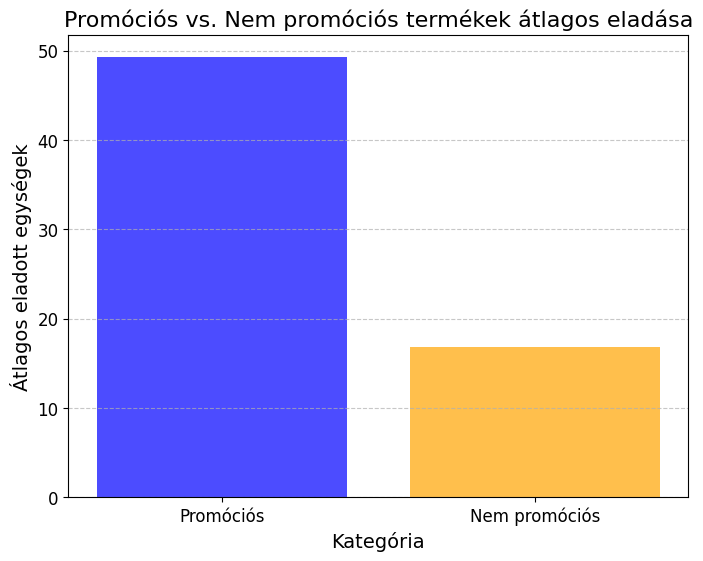

In [ ]:

promo_sales = transaction[transaction['FEATURE'] == 1]['UNITS']
non_promo_sales = transaction[transaction['FEATURE'] == 0]['UNITS']

# Átlagok kiszámítása
promo_mean = promo_sales.mean()
non_promo_mean = non_promo_sales.mean()

# Diagram készítése
plt.figure(figsize=(8, 6))
categories = ['Promóciós', 'Nem promóciós']
averages = [promo_mean, non_promo_mean]

# Bar chart
plt.bar(categories, averages, color=['blue', 'orange'], alpha=0.7)
plt.title("Promóciós vs. Nem promóciós termékek átlagos eladása", fontsize=16)
plt.ylabel("Átlagos eladott egységek", fontsize=14)
plt.xlabel("Kategória", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


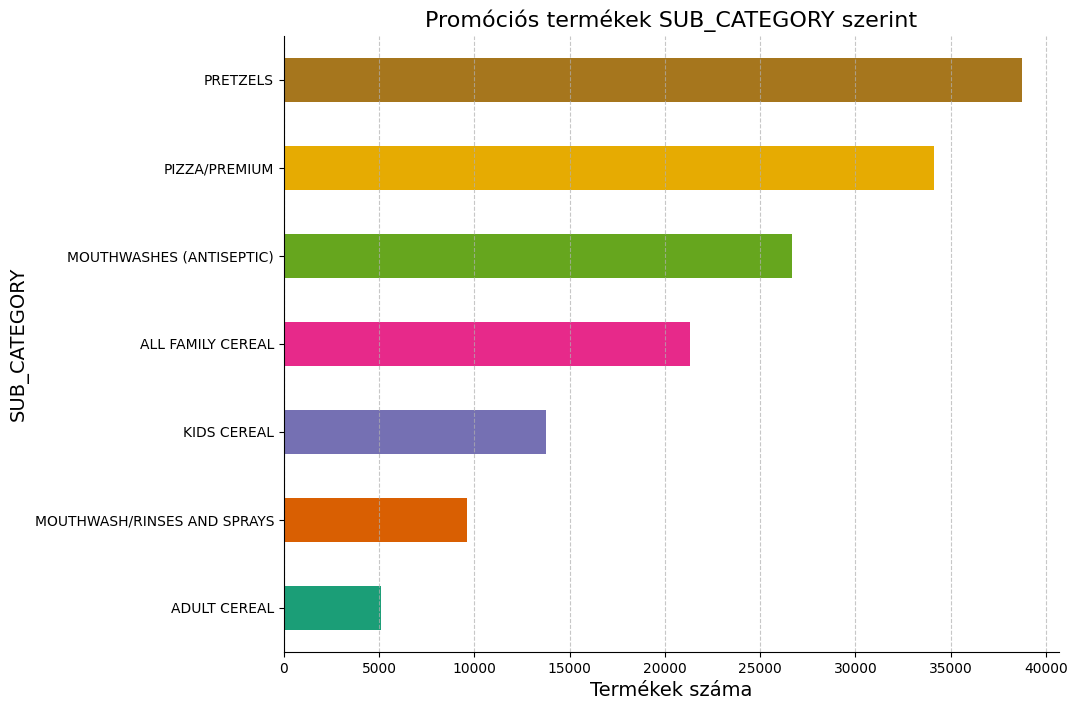

In [ ]:

# Promóciós termékek szűrése
promo_products = transaction[
    (transaction['FEATURE'] == 1) |
    (transaction['DISPLAY'] == 1) |
    (transaction['TPR_ONLY'] == 1)
]

# Összekapcsoljuk a tranzakciókat a termékek adatával
promo_products_with_names = promo_products.merge(products, on='UPC', how='left')

# Promóciós termékek kategória szerinti összesítése
promo_subcategory_summary = promo_products_with_names.groupby('SUB_CATEGORY').size().sort_values()

# Diagram készítése
plt.figure(figsize=(10, 8))
promo_subcategory_summary.plot(kind='barh', color=sns.color_palette('Dark2'))

# Diagram stílus
plt.title("Promóciós termékek SUB_CATEGORY szerint", fontsize=16)
plt.xlabel("Termékek száma", fontsize=14)
plt.ylabel("SUB_CATEGORY", fontsize=14)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

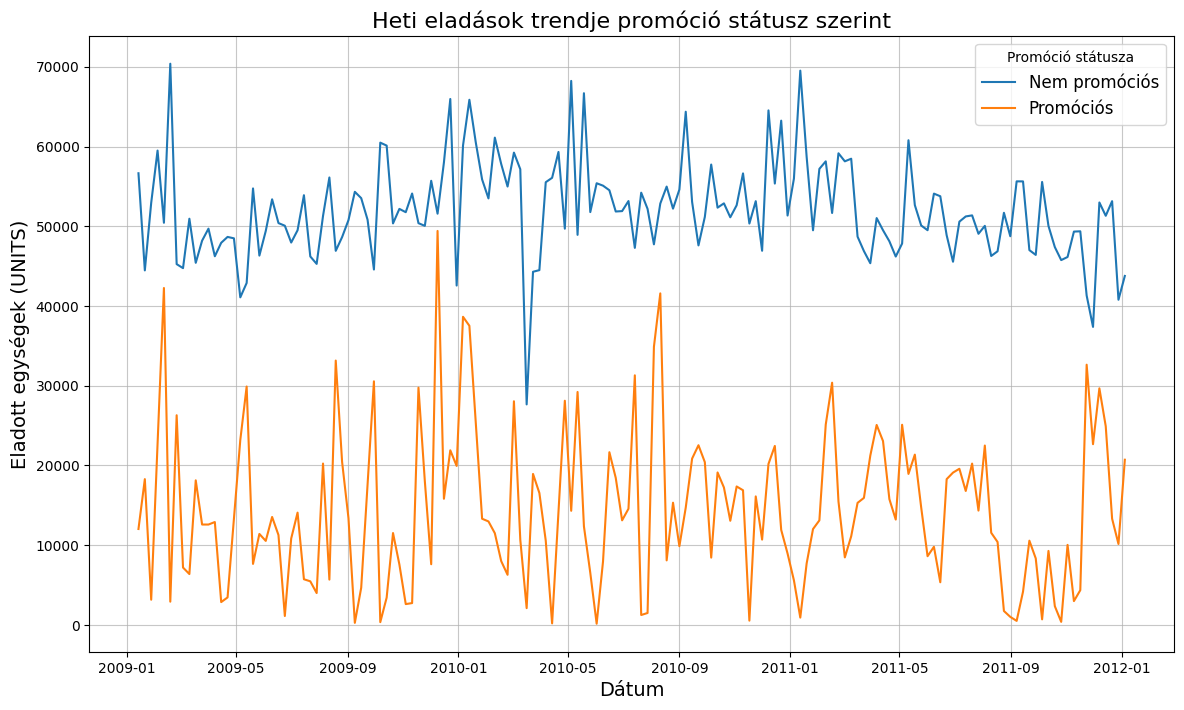

In [ ]:
# Heti eladások trendje promóciós bontásban
promo_sales_trend = transaction.groupby(['WEEK_END_DATE', 'PROMOTION_STATUS'])['UNITS'].sum().reset_index()
plt.figure(figsize=(14, 8))
for promo_type, data in promo_sales_trend.groupby('PROMOTION_STATUS'):
    plt.plot(data['WEEK_END_DATE'], data['UNITS'], label=promo_type)
plt.title('Heti eladások trendje promóció státusz szerint', fontsize=16)
plt.xlabel('Dátum', fontsize=14)
plt.ylabel('Eladott egységek (UNITS)', fontsize=14)
plt.legend(title='Promóció státusza', fontsize=12)
plt.grid(alpha=0.7)
plt.show()

A grafikon a heti eladások trendjét ábrázolja promóciós és nem promóciós termékek bontásában az idő során. Az alábbi kulcsfontosságú megfigyelések tehetők:

**1. Nem promóciós termékek eladási trendje:**
 A nem promóciós termékek eladása viszonylag stabil maradt az időszak alatt, kisebb ingadozásokkal. Az eladások a legtöbb héten 50 000–70 000 egység körül mozogtak, ami jelentős mértékű stabil vásárlói keresletet jelez ezeknél a termékeknél. Az időszak végén (2011 vége) enyhe csökkenés figyelhető meg, ami szezonális vagy gazdasági hatás következménye lehet.

**2. Promóciós termékek eladási trendje**:
A promóciós termékek eladásai jelentősen ingadoznak az időszak során. Az eladások rendszeresen csúcsokat érnek el, ami azt jelzi, hogy a promóciók hatásosak, de ezek az értékek nem állandóak. A legmagasabb csúcsok 30 000–40 000 egység körül mozognak, ami azt jelzi, hogy a promóciók képesek jelentős vásárlói érdeklődést generálni. Az eladási csúcsok szezonális mintázatot követnek, valószínűleg az ünnepi időszakokhoz vagy szezonális akciókhoz kötődnek (pl. év vége, nyári időszak).

**3. Promóciók és nem promóciók összehasonlítása:**
 A nem promóciós termékek eladása stabilabb, és rendszerint magasabb, mint a promóciós termékeké. Ez azt mutatja, hogy a nem promóciós termékek stabil kereslettel rendelkeznek. A promóciók alkalmanként képesek közelíteni a nem promóciós termékek eladási szintjéhez, de általában alatta maradnak. A promóciók hatása rövid távú, amit a csúcsok utáni gyors visszaesés jelez.

**4. Javaslatok Promóciós stratégiák erősítése:**
A promóciókat érdemes az eladási csúcsok környékére időzíteni, hogy kihasználják a meglévő szezonális keresletet. Nem promóciós termékek kiemelése: Stabil keresletük miatt érdemes ezen termékekre hosszabb távú marketingstratégiát építeni. További elemzés: Megéri megvizsgálni a promóciós csúcsok konkrét okait (pl. milyen típusú promóciók voltak, milyen termékeket érintettek), hogy a jövőben hasonló akciók jobban tervezhetők legyenek.


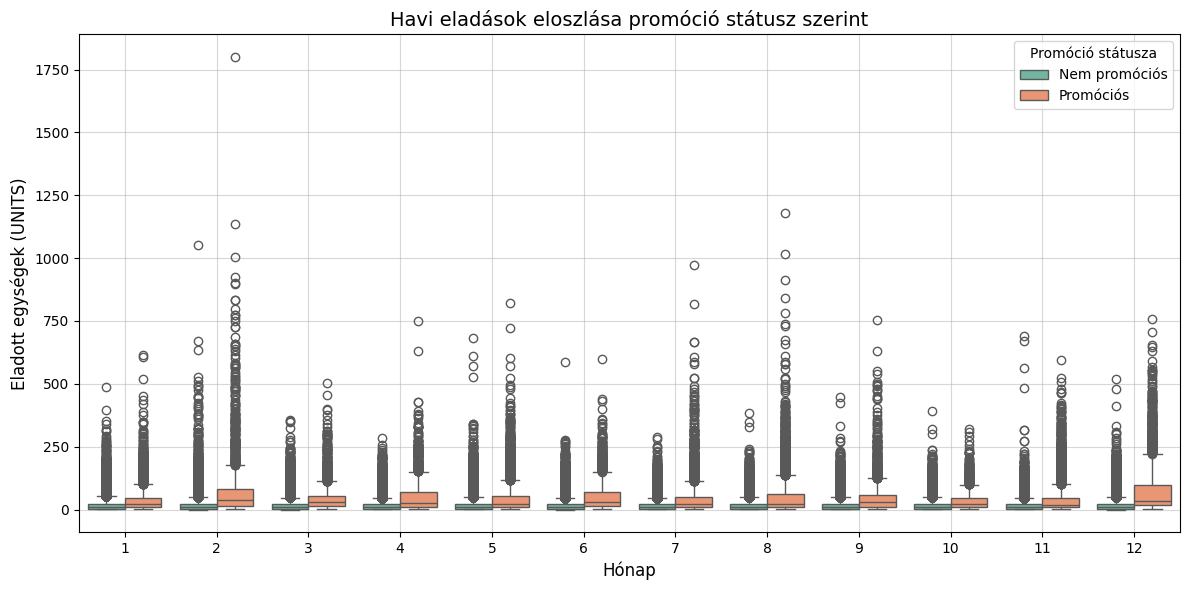

In [ ]:
# Havi eladások előkészítése
transaction['MONTH'] = transaction['WEEK_END_DATE'].dt.month
transaction['PROMOTION_STATUS'] = transaction['FEATURE'].apply(lambda x: 'Promóciós' if x == 1 else 'Nem promóciós')

# Boxplot készítése havi bontásban promóció státusz szerint
plt.figure(figsize=(12, 6))
sns.boxplot(data=transaction, x='MONTH', y='UNITS', hue='PROMOTION_STATUS', palette='Set2')

# Diagram beállítások
plt.title("Havi eladások eloszlása promóció státusz szerint", fontsize=14)
plt.xlabel("Hónap", fontsize=12)
plt.ylabel("Eladott egységek (UNITS)", fontsize=12)
plt.legend(title="Promóció státusza", fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


**Havi eladások eloszlása promóciós státusz szerint**

1. **Eladások eloszlása hónapok szerint**:
   - A legtöbb hónapban a nem promóciós termékek jelentősen nagyobb eladott mennyiséget mutatnak, amit az eloszlás mediánja (doboz közepe) és a szélsőértékek (körök) egyaránt alátámasztanak.
   - A promóciós termékek eladása alacsonyabb, de a szélsőértékek arra utalnak, hogy bizonyos esetekben a promóciók jelentősen megugraszthatják az eladásokat.

2. **Promóciók hatása az eloszlásra**:
   - A promóciós termékek dobozai (medián, interkvartilis tartomány) általában alacsonyabb értékeket mutatnak, de a szélsőértékek (outlierek) gyakrabban magasabbak, jelezve, hogy egyes promóciók nagyon hatékonyak lehetnek.
   - Például a 12. hónapban (december) a promóciós termékek jelentős eladási kiugrásokat mutatnak, ami az ünnepi időszak promóciós kampányainak hatását tükrözheti.

3. **Szezonális mintázatok**:
   - A nem promóciós termékek eladása stabilabb hónapról hónapra, a medián értékek kisebb eltéréseket mutatnak.
   - A promóciós eladások hónapról hónapra változékonyabbak, ami arra utalhat, hogy a promóciók időzítése és intenzitása jelentősen befolyásolja az eredményeket.

4. **Értékesítési stratégiák optimalizálása**:
   - A promóciós kampányokat érdemes olyan hónapokra időzíteni, amikor a szélsőértékek elérése valószínűbb (pl. ünnepek előtt).
   - A stabilabb hónapokban a nem promóciós eladások erősítése hosszú távú stratégiaként szolgálhat.



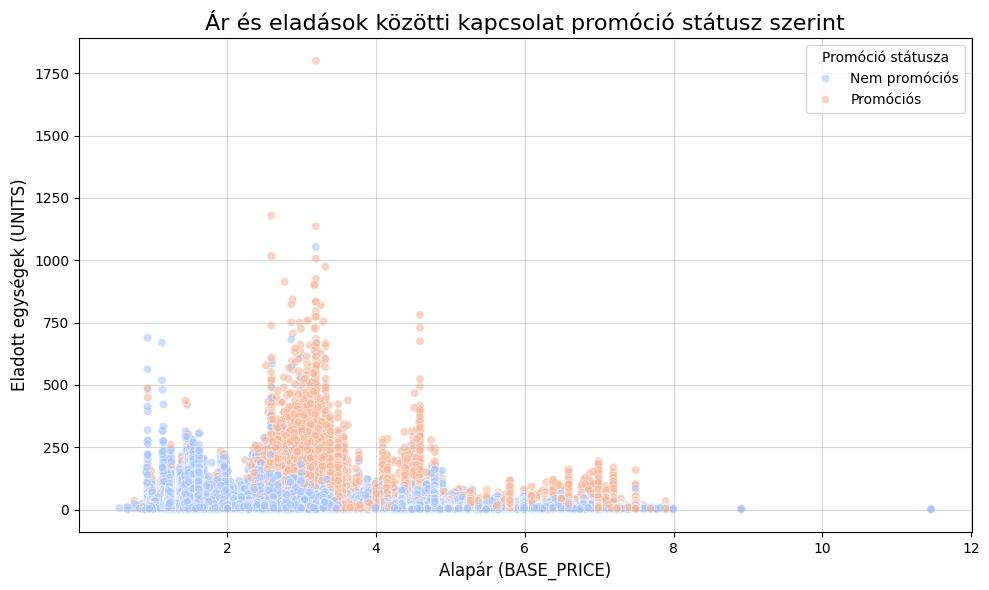

In [ ]:
# Árérzékenységi elemzés
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transaction, x='BASE_PRICE', y='UNITS', hue='PROMOTION_STATUS', alpha=0.6, palette='coolwarm')
plt.title('Ár és eladások közötti kapcsolat promóció státusz szerint', fontsize=16)
plt.xlabel('Alapár (BASE_PRICE)', fontsize=12)
plt.ylabel('Eladott egységek (UNITS)', fontsize=12)
plt.legend(title='Promóció státusza', fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

**Ár és eladások közötti kapcsolat promóció státusz szerint**

1. **Ár-érzékenység megfigyelése**:
   - A diagramon látható, hogy az alacsonyabb árak (1 és 4 között) esetén az eladások száma lényegesen magasabb, függetlenül attól, hogy a termék promóciós vagy nem promóciós.
   - Magasabb árak (4 felett) esetén az eladások száma jelentősen csökken, ami erős ár-érzékenységre utal.

2. **Promóciók hatása**:
   - A promóciós termékek (narancssárga pontok) eladásai koncentráltabban és nagyobb mértékben jelennek meg az alacsonyabb áraknál. Ez azt jelzi, hogy a promóciók különösen hatékonyak az ár-érzékeny vásárlók esetében.
   - A nem promóciós termékek (kék pontok) esetében az eladások szórtabbak, de általában alacsonyabbak, különösen az ár növekedésével.

3. **Kiemelkedő értékek (szélsőértékek)**:
   - Az alacsony áraknál néhány promóciós termék kiugróan magas eladást mutat (>1000 eladott egység), ami egyes sikeres kampányokra vagy nagy volumenű vásárlásokra utalhat.
   - Magasabb áraknál szinte nincsenek szélsőértékek, ami azt mutatja, hogy a vásárlók kevésbé hajlamosak vásárolni ilyen esetekben.

4. **Árhatás különbsége a státusz szerint**:
   - A promóciók sokkal jobban kihasználják az alacsony árak előnyét, míg a nem promóciós termékek kevésbé reagálnak az ár csökkentésére.


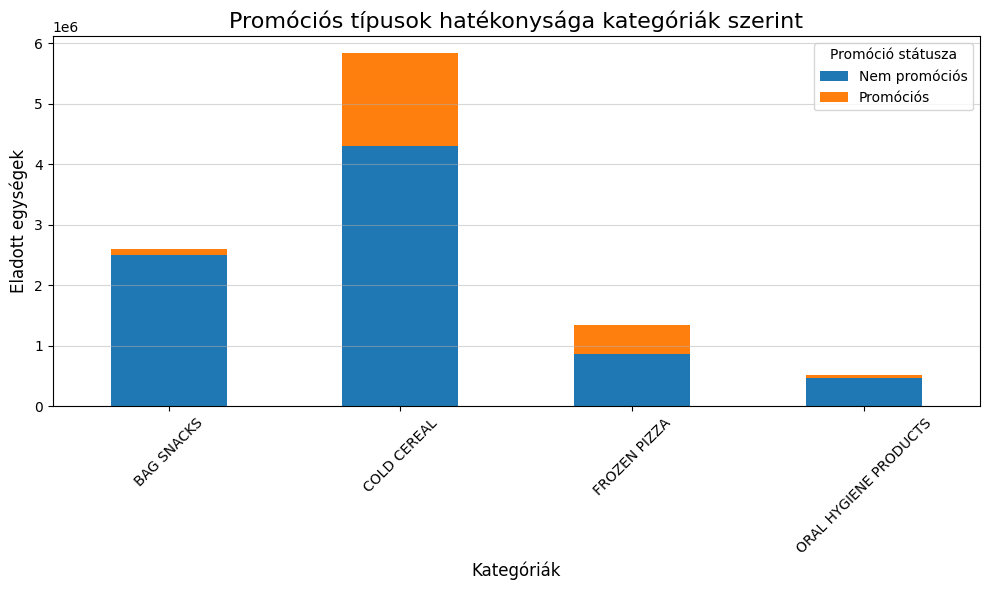

In [ ]:
# Promóciós típusok hatékonysága kategóriák szerint
promo_effectiveness = transaction_with_category.groupby(['CATEGORY', 'PROMOTION_STATUS'])['UNITS'].sum().unstack()
promo_effectiveness.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Promóciós típusok hatékonysága kategóriák szerint', fontsize=16)
plt.xlabel('Kategóriák', fontsize=12)
plt.ylabel('Eladott egységek', fontsize=12)
plt.legend(title='Promóció státusza', fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

A promóciók hatékonysága jelentősen eltér kategóriánként.

A "Cold Cereal" kategória kiemelkedően teljesít, ahol a promóciók jelentősen növelik az eladásokat, így érdemes erre a kategóriára fókuszálni.

A "Bag Snacks" és "Frozen Pizza" kategóriákban a promóciók mérsékelt hatással bírnak, ezért specifikusabb stratégiákra lehet szükség. Az "Oral Hygiene Products" kategória alacsony eladásokat mutat, és a promóciók itt kevésbé hatékonyak.

Összességében a promóciós erőforrásokat a magasabb potenciállal rendelkező kategóriákra kell optimalizálni, miközben az alacsony teljesítményű kategóriákban további elemzéseket végezhetünk.

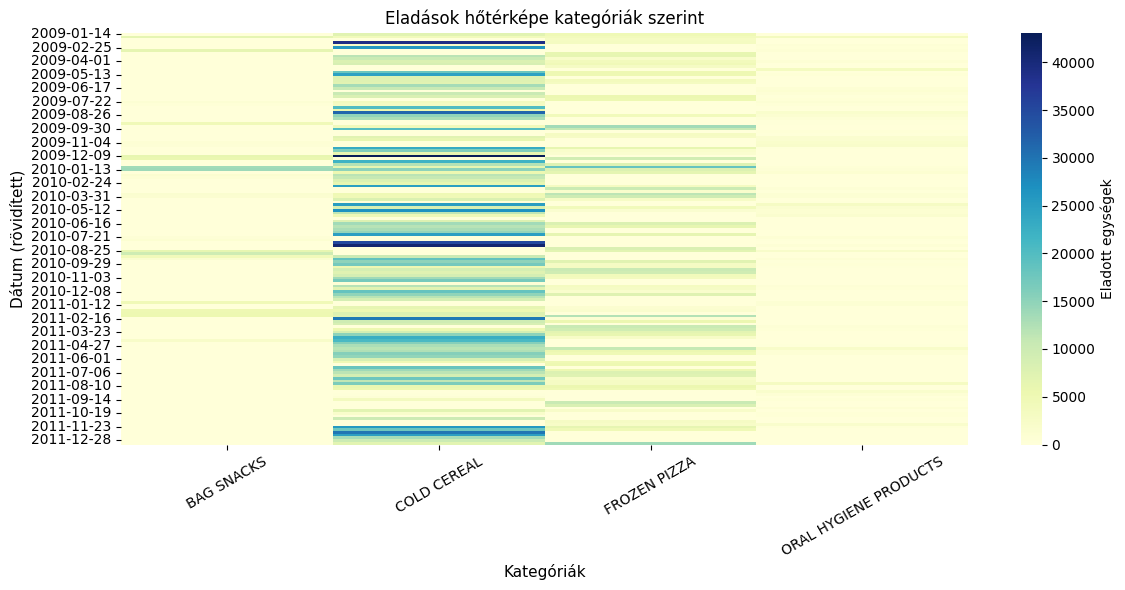

In [ ]:
# 1. Termékek és tranzakciók összekapcsolása
transaction_with_category = transaction.merge(products, on='UPC', how='left')

# 2. Rövidített dátum formátum kialakítása
transaction_with_category['SHORT_DATE'] = transaction_with_category['WEEK_END_DATE'].dt.strftime('%Y-%m-%d')

# 3. Kategóriák szerint aggregálás (csak promóciós termékekre)
category_data = transaction_with_category[
    transaction_with_category['FEATURE'] == 1
].groupby(['SHORT_DATE', 'CATEGORY'])['UNITS'].sum().reset_index()

# 4. Hőtérkép adatok előkészítése kategóriákhoz
heatmap_data_categories = category_data.pivot_table(
    values='UNITS', index='SHORT_DATE', columns='CATEGORY', aggfunc='sum'
).fillna(0)

# 5. Hőtérkép megjelenítése kategóriák szerint
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_categories, cmap='YlGnBu', cbar_kws={'label': 'Eladott egységek'})
plt.title("Eladások hőtérképe kategóriák szerint", fontsize=12)
plt.xlabel("Kategóriák", fontsize=11)
plt.ylabel("Dátum (rövidített)", fontsize=11)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


**1. Kategóriák közötti különbségek**
A "Cold Cereal" kategória dominálja az eladásokat, különösen az időszak középső részében. Az intenzívebb kék szín jelzi, hogy ebben a kategóriában rendszeresen kiugróan magas eladások történtek. A "Frozen Pizza" és "Bag Snacks" kategóriák eladásai szintén figyelemre méltóak, de ezek kevésbé egyenletesek. Az eladások ezekben a kategóriákban valószínűleg promóciókhoz vagy szezonális hatásokhoz kötődnek. Az "Oral Hygiene Products" kategória alacsony eladásokat mutat az egész időszakban, valószínűleg kisebb kereslet vagy kevésbé intenzív promóciós tevékenység miatt.

**2. Időbeli mintázatok**
Szezonális csúcsok: Az eladásokban bizonyos időszakokban erőteljes növekedés figyelhető meg, például az ünnepi időszakok körül (pl. év végi hetekben). Ezeket a csúcsokat valószínűleg szezonális promóciók hajtják. Nyári csökkenés: Nyáron (június–augusztus) az eladások általában alacsonyabbak, különösen a "Cold Cereal" és "Frozen Pizza" kategóriákban. Ez arra utalhat, hogy a fogyasztási szokások ezekben az időszakokban változnak.


**3. Konklúzió**
Promóciós fókusz a gyengébb kategóriákban: Érdemes lenne promóciós stratégiát kidolgozni az "Oral Hygiene Products" és "Bag Snacks" kategóriák számára, hogy növeljék az eladásokat a gyengébb időszakokban.


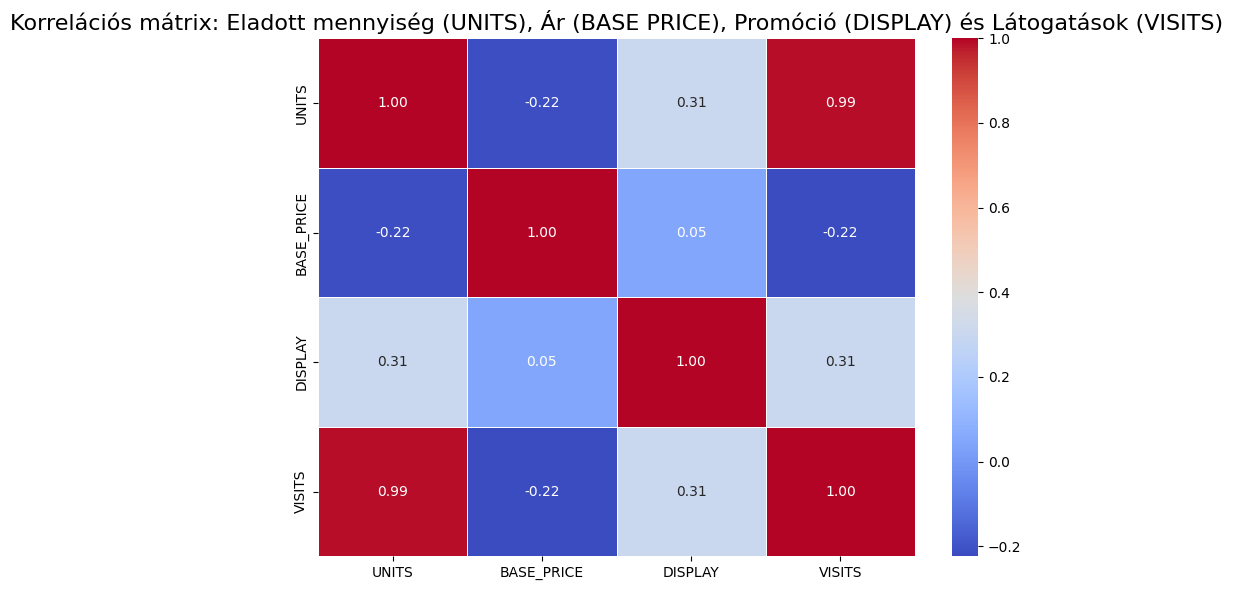

In [ ]:
# Kiválasztott változók korrelációs mátrixa: UNITS, BASE_PRICE, DISPLAY, VISITS
selected_corr_matrix = transaction[['UNITS', 'BASE_PRICE', 'DISPLAY', 'VISITS']].corr()

# Hőtérkép létrehozása
plt.figure(figsize=(8, 6))
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Korrelációs mátrix: Eladott mennyiség (UNITS), Ár (BASE PRICE), Promóció (DISPLAY) és Látogatások (VISITS)", fontsize=16)
plt.tight_layout()
plt.show()


**Következtetések - Látogatások száma a kulcs az eladások növeléséhez:**

Az UNITS és VISITS közötti erős korreláció arra utal, hogy a vásárlói forgalom növelése kulcsfontosságú az értékesítés maximalizálásához.
Érdemes marketing- és promóciós stratégiákat alkalmazni a látogatások ösztönzésére.
Promóciók hatása az eladásokra:

A promóciók (DISPLAY) pozitívan befolyásolják az eladásokat, de ez a hatás mérsékelt. Ez azt jelenti, hogy a promóciókat más tényezőkkel (pl. árengedmények, szezonális kampányok) kombinálva kell alkalmazni.
Árérzékenység:

Az ár (BASE_PRICE) negatívan korrelál az eladásokkal és a látogatásokkal, de a korreláció mértéke viszonylag gyenge. Ez arra utal, hogy az ár csak az egyik tényező az eladások befolyásolásában.

Ajánlások az üzleti stratégiához Látogatószám növelése:

Fektessetek be kampányokba és hirdetésekbe, amelyek növelik a vásárlói forgalmat (pl. hűségprogramok, események). Promóciós stratégiák optimalizálása:

A promóciók hatékony eszközök lehetnek az eladások növelésére, de a hatás maximalizálása érdekében érdemes azokat kiemelten keresett termékekre vagy szezonális időszakokra fókuszálni. Árpolitika finomítása:

Bár az árérzékenység viszonylag gyenge, érdemes vizsgálni az árengedmények hatását bizonyos kategóriákra és termékekre.

# 4. Hipotézis Vizsgálat

In [ ]:
# ANOVA teszt a promóciós típusok hatékonyságára
feature_units = transaction[transaction['FEATURE'] == 1]['UNITS']
display_units = transaction[transaction['DISPLAY'] == 1]['UNITS']
tpr_only_units = transaction[transaction['TPR_ONLY'] == 1]['UNITS']
anova_result = f_oneway(feature_units, display_units, tpr_only_units)
print(f'ANOVA teszt eredménye: F-statisztika = {anova_result.statistic:.2f}, P-érték = {anova_result.pvalue:.4f}')
if anova_result.pvalue < 0.05:
    print('Szignifikáns különbség van a promóciós típusok hatékonyságában.')
else:
    print('Nincs szignifikáns különbség a promóciós típusok hatékonyságában.')

ANOVA teszt eredménye: F-statisztika = 7204.06, P-érték = 0.0000
Szignifikáns különbség van a promóciós típusok hatékonyságában.


**Az ANOVA teszt lényege ebben a kontextusban:**

Az ANOVA (Analysis of Variance) egy statisztikai teszt, amely azt vizsgálja, hogy három vagy több csoport közötti átlagok között van-e szignifikáns különbség. Ebben az esetben a **három különböző promóciós típus (FEATURE, DISPLAY, TPR_ONLY)** hatékonyságát hasonlítjuk össze az eladott mennyiségek (UNITS) alapján.

---

### **Elemzés lépései:**
1. **Csoportosítás a promóciós típusok szerint:**
   - **FEATURE:** Olyan termékek, amelyek kiemelt promócióban részesültek.
   - **DISPLAY:** Olyan termékek, amelyek bolti kiemelt helyen (pl. display-en) kerültek bemutatásra.
   - **TPR_ONLY:** Olyan termékek, amelyek árengedményt kaptak promóció nélkül.

   Az `UNITS` oszlop alapján külön csoportokba soroljuk az eladott mennyiségeket a promóció típusa szerint.

2. **ANOVA teszt futtatása:**
   Az ANOVA teszt segítségével megvizsgáljuk, hogy a három promóciós típushoz tartozó eladások átlaga között van-e statisztikailag szignifikáns különbség.

3. **Eredmény értelmezése:**
   - **F-statisztika:** A csoportok közötti eltérést méri a csoporton belüli eltéréshez képest. Minél nagyobb az F-érték, annál erősebb a különbség.
   - **P-érték:** A szignifikancia mértéke. Ha a p-érték kisebb, mint 0.05, akkor elutasítjuk a nullhipotézist (ami szerint nincs különbség).

---

### **Az eredmények magyarázata:**
1. **F-statisztika:** 7204.06
   - Ez az érték nagyon magas, ami erős különbséget jelez a promóciós típusok hatékonyságában.

2. **P-érték:** 0.0000
   - A p-érték extrém kicsi, ami azt jelenti, hogy a különbségek statisztikailag szignifikánsak.

3. **Következtetés:**
   - **Szignifikáns különbség van a három promóciós típus (FEATURE, DISPLAY, TPR_ONLY) hatékonyságában.**
   - Ez azt jelenti, hogy az eladott mennyiségeket különböző mértékben befolyásolja, hogy milyen promóciós típus került alkalmazásra.

---

### **Hogyan hasznosítható az üzleti életben?**
- **Optimalizáció:** Az eredmények alapján azonosítható, hogy melyik promóciós típus a leghatékonyabb. Például, ha a "DISPLAY" típus sokkal jobban teljesít, érdemes erre összpontosítani az erőforrásokat.
- **Költségcsökkentés:** Az eredmények segítenek elkerülni a kevésbé hatékony promóciós típusok túlzott használatát.
- **Stratégia kialakítása:** Az elemzés alapján érdemes lehet kombinálni a hatékonyabb promóciós típusokat (pl. árkedvezmények kiemelt helyen történő megjelenítéssel).


<ipython-input-40-78ccdc65d15c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=anova_data, x='Promóció típus', y='Eladott egységek', hue=None, dodge=False, palette='Set1')


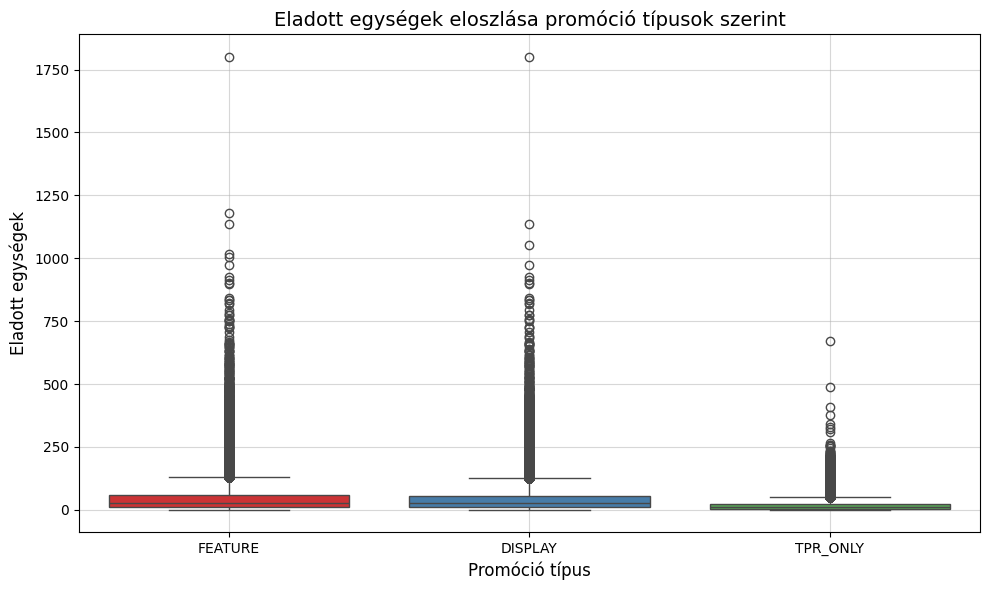

In [ ]:
# Boxplot az eloszlás bemutatására külön színekkel
plt.figure(figsize=(10, 6))
sns.boxplot(data=anova_data, x='Promóció típus', y='Eladott egységek', hue=None, dodge=False, palette='Set1')
plt.title("Eladott egységek eloszlása promóció típusok szerint", fontsize=14)
plt.xlabel("Promóció típus", fontsize=12)
plt.ylabel("Eladott egységek", fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()




**A boxplot rávilágít, hogy a különböző promóciós típusok különböző mértékben befolyásolják az eladásokat:.**

**A FEATURE típus - promócióban részesült termékek -**  a legszélesebb spektrumon oszlik meg, ami nagyobb lehetőséget kínál az eladások növelésére, de magasabb kockázatot is jelenthet az egyenletes teljesítmény elérésében.

**A DISPLAY típus - bolti displayeken kerültek kiállításra -**  stabilabb, de kevésbé drámai eredményeket hozhat.

**A TPR_ONLY típus - promóció nélküli akciós termékek -** kisebb hatékonyságot mutat, ezért más promóciós stratégiákkal kombinálva lehet előnyös.

# 5. Hosszútávú idősor vizsgálata

In [ ]:
# Aggregált heti eladások előkészítése
weekly_sales = transaction.groupby('WEEK_END_DATE')['UNITS'].sum().reset_index()

# Idősor index beállítása
weekly_sales['WEEK_END_DATE'] = pd.to_datetime(weekly_sales['WEEK_END_DATE'])
weekly_sales.set_index('WEEK_END_DATE', inplace=True)

# Idősor vizsgálata
print(weekly_sales.head())


               UNITS
WEEK_END_DATE       
2009-01-14     68681
2009-01-21     62750
2009-01-28     56099
2009-02-04     59495
2009-02-11     92694


In [ ]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 15.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-WED will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


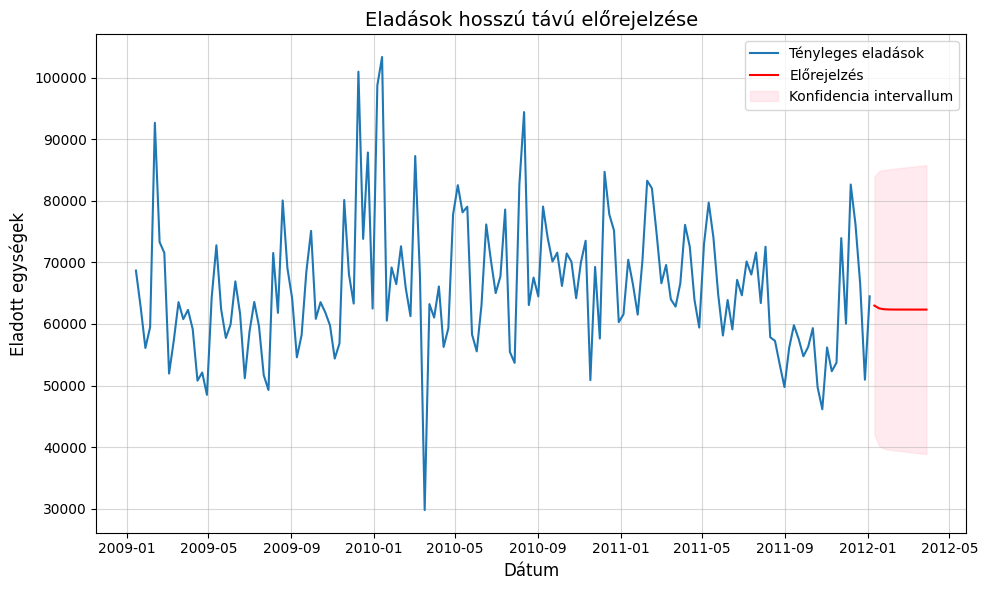

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# ARIMA modell létrehozása
model = ARIMA(weekly_sales['UNITS'], order=(1, 1, 1))  # ARIMA(p, d, q) paraméterek optimalizálhatók
fitted_model = model.fit()

# Előrejelzés
forecast = fitted_model.get_forecast(steps=12)  # 12 hetes előrejelzés
forecast_ci = forecast.conf_int()

# Előrejelzés megjelenítése
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales.index, weekly_sales['UNITS'], label="Tényleges eladások")
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label="Előrejelzés", color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label="Konfidencia intervallum")
plt.title("Eladások hosszú távú előrejelzése", fontsize=14)
plt.xlabel("Dátum", fontsize=12)
plt.ylabel("Eladott egységek", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


### **Elemzés az eladások hosszú távú előrejelzéséről**

#### **Grafikon értelmezése:**
A grafikon az eladások idősorának tényleges értékeit, a modell által előrejelzett eladási trendet, valamint az előrejelzéshez tartozó konfidencia intervallumot ábrázolja:
- **Tényleges eladások (kék vonal):** Az elmúlt évek heti eladási egységeit mutatja.
- **Előrejelzés (piros vonal):** A modell alapján becsült jövőbeli eladások.
- **Konfidencia intervallum (rózsaszín sáv):** Az előrejelzés bizonytalanságának mértéke. A szélesebb sáv nagyobb bizonytalanságot jelent.

---

#### **Megfigyelések:**
1. **Tényleges eladások (történeti adatok):**
   - Az eladások jelentős ingadozást mutatnak, amely szezonális mintákra és időszakos kiugró értékekre utal.
   - 2009 elején és 2010 közepén jelentősebb csúcsok figyelhetők meg, ami promóciókhoz vagy szezonális eseményekhez kapcsolódhat.

2. **Előrejelzés:**
   - Az előrejelzett értékek a legutóbbi trendek alapján egy stabil szinten maradnak, de nem veszik figyelembe a szezonális csúcsokat vagy drasztikus csökkenéseket. Ez a modell egyszerűségét tükrözi, amely a történeti átlagot és a trendet veszi alapul.
   - A piros vonal (előrejelzés) nem mutat jelentős növekedést vagy csökkenést, ami arra utalhat, hogy a jelenlegi trendek alapján stabilizálódó eladási szint várható.

3. **Konfidencia intervallum:**
   - A rózsaszín sáv szélessége azt mutatja, hogy az előrejelzés bizonytalansága nő a jövőbeli időszakokban.
   - Az előrejelzés relatív szűk intervalluma rövidtávon viszonylag nagy biztonsággal értelmezhető, de hosszabb távon nagyobb kockázatot jelenthet.


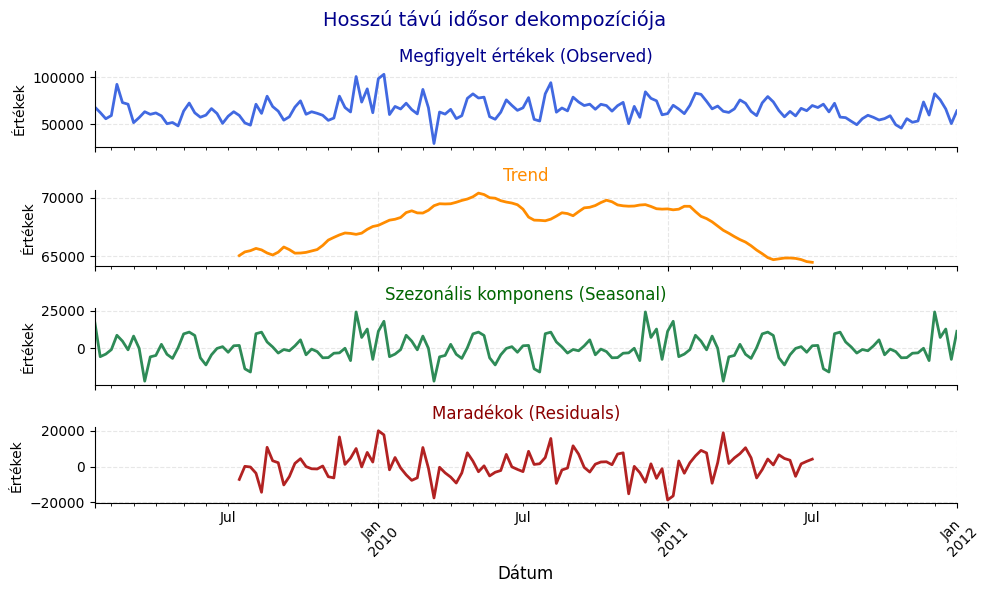

In [ ]:
# Idősor dekompozíciója
decomposition = seasonal_decompose(weekly_sales['UNITS'], model='additive', period=52)  # Éves szezonális hatás

# Plotolás színekkel és stílusokkal
fig, axes = plt.subplots(4, 1, figsize=(10, 6), sharex=True)

# Egyedi színek és stílusok beállítása
decomposition.observed.plot(ax=axes[0], color='royalblue', linewidth=2)
axes[0].set_title("Megfigyelt értékek (Observed)", fontsize=12, color='darkblue')
axes[0].grid(alpha=0.3, linestyle='--')

decomposition.trend.plot(ax=axes[1], color='darkorange', linewidth=2)
axes[1].set_title("Trend", fontsize=12, color='darkorange')
axes[1].grid(alpha=0.3, linestyle='--')

decomposition.seasonal.plot(ax=axes[2], color='seagreen', linewidth=2)
axes[2].set_title("Szezonális komponens (Seasonal)", fontsize=12, color='darkgreen')
axes[2].grid(alpha=0.3, linestyle='--')

decomposition.resid.plot(ax=axes[3], color='firebrick', linewidth=2)
axes[3].set_title("Maradékok (Residuals)", fontsize=12, color='darkred')
axes[3].grid(alpha=0.3, linestyle='--')

# X-tengely címkék és elrendezés
axes[3].set_xlabel("Dátum", fontsize=12)
axes[3].tick_params(axis='x', rotation=45, labelsize=10)

# Y-tengely címek
for ax in axes:
    ax.set_ylabel("Értékek", fontsize=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Főcím
plt.suptitle("Hosszú távú idősor dekompozíciója", fontsize=14, color='darkblue')
plt.tight_layout()
plt.show()




**Elemzés a hosszú távú idősor dekompozíciójáról**

**1. Megfigyelt értékek (Observed):**
Az első grafikon a heti eladási egységek (UNITS) idősoros ábrázolását mutatja. Az értékek nagy ingadozást mutatnak, ami arra utal, hogy az eladások nem állandóak, és valószínűleg több tényező, például szezonális hatások, promóciók és piaci változások befolyásolják. Az értékek 50 000 és 100 000 között ingadoznak, bizonyos időszakokban jelentős csúcsokkal.

**2. Trend:**
A trendvonal az eladások hosszú távú alakulását mutatja. Az eladások kezdetben enyhén növekednek, majd egyértelmű csúcsot érnek el 2010 közepén. Ezután egy csökkenő tendencia figyelhető meg. Ez a változás arra utalhat, hogy egy adott időszakban növekedtek az értékesítési kampányok vagy az áruházak forgalma, míg később ezek hatékonysága csökkent, vagy szezonális trendek gyengültek.

**3. Szezonális komponens (Seasonal):**
A harmadik grafikon az eladások szezonális ingadozásait mutatja, amelyek az év során rendszeresen ismétlődnek. Ez a komponens kiemeli, hogy bizonyos időszakokban (valószínűleg ünnepi szezonokban) az eladások jelentősen megemelkedhetnek, míg más időszakokban csökkennek. Ezek az ingadozások fontosak a marketingstratégiák időzítése szempontjából.

**4. Maradékok (Residuals):**
Az utolsó grafikon a maradékokat ábrázolja, amelyek az idősor megfigyelt értékei és a dekompozíció által modellezett komponensek különbségei. Ezek véletlenszerű ingadozásokat mutatnak, amelyek nem magyarázhatók sem a trenddel, sem a szezonális hatásokkal. Ezek a részek a véletlenszerű események (pl. rendkívüli promóciók, váratlan piaci változások) hatását jelezhetik.

---

**Következtetések:**
1. **Trend változások:** Az eladások csúcsai és esései figyelmeztetnek arra, hogy a marketingtevékenységek és promóciók hosszú távon fenntartható hatékonyságot igényelnek.
2. **Szezonális hatások:** A szezonális komponens segíthet az értékesítési kampányok időzítésében, különösen az ismétlődő csúcsidőszakok során.
3. **Taktikai beavatkozások:** A maradékok vizsgálata további lehetőségeket kínál az egyszeri, nem tervezett események (pl. egyedi promóciók) hatásának elemzésére.

---

**Üzleti alkalmazhatóság:**
- Az eredmények segíthetnek az értékesítési csapatnak a kampányok időzítésének optimalizálásában.
- A trendek és szezonális ingadozások alapján az árképzés és készletezés is optimalizálható.
- A maradékok elemzése rámutathat, hogy hol érdemes további vizsgálatokat végezni a váratlan események hatásának felderítésére.

In [2]:
import subprocess

# Replace 'file.ipynb' with the path to your notebook
subprocess.run(["jupyter-nbconvert", "--to", "html", "file.ipynb"])

CompletedProcess(args=['jupyter-nbconvert', '--to', 'html', 'file.ipynb'], returncode=255)